In [56]:
import pandas as pd   
import numpy          
from sklearn import svm      
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_csv('data_arrhythmia.csv')

In [58]:
data.head(10)

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10


In [59]:
data["diagnosis"].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15], dtype=int64)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [61]:
data.describe()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.454474,0.497587,37.142898,16.578554,15.353051,44.809176,33.360774,35.606765,25.807576,45.397893,...,0.548471,3.470298,2.000951,0.050081,0.0,0.347274,1.424999,13.493952,18.480273,4.403843
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# PRE PROCESSING DATA (Removing Missing & NaN values)

In [62]:
data = data.fillna(data.mean())

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [64]:
data.isnull().sum()

Age             0
Sex             0
Height          0
Weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [65]:
X = data.iloc[:,:-1]
#create feature matrix
#reader=csv.reader(open("feature.csv","r"),delimiter=",")
#X=list(reader)
X=numpy.array(X)
X=X.astype(float)

y = data.iloc[:,-1]
#create result vector
#reader=csv.reader(open("target_output.csv","r"),delimiter=",")
#y=list(reader)
y=numpy.array(y)
y=y.astype(int)


In [66]:
#applying random forests to get pricipal attributes
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y.ravel())
#print(model)
#print(model.feature_importances_)

numpy.savetxt("randforrests.csv", model.feature_importances_, fmt='%s', delimiter=",")

#selecting features 
c=0;
important_features=numpy.zeros((278),dtype=float)
important_features_index=numpy.zeros((278),dtype=int)

for i in range (0,278):
    if((model.feature_importances_[i]*1000)>=4.5):
        important_features[c]=model.feature_importances_[i]
        important_features_index[c]=i
        c=c+1

print(important_features)
print(important_features_index)
print("The no of features =",c)

#features are reduced  from 278


numpy.savetxt("import_features_index_after_random_forrests.csv",important_features_index, fmt='%s', delimiter=",")

#new matrix compirising of reduced features
newX=numpy.zeros((1356 ,c),dtype=float)
for i in range (0,1356 ):
    for j in range (0,c):
        newX[i][j]=X[i][important_features_index[j]]


print(newX)

numpy.savetxt("reduced_features.csv",newX, fmt='%s', delimiter=",")

[0.00516784 0.00625676 0.00479963 0.00483859 0.00945697 0.00480761
 0.00789971 0.0078351  0.00458692 0.00465418 0.00760311 0.00552039
 0.02142572 0.00578819 0.00616456 0.00510108 0.00513409 0.00453537
 0.00586571 0.00485871 0.00558533 0.00645355 0.00505769 0.00505482
 0.00475699 0.00711548 0.00461632 0.00479113 0.00506845 0.00476155
 0.00624127 0.0249196  0.02322101 0.00598983 0.00789537 0.01326709
 0.00667522 0.01015627 0.00934889 0.00953435 0.00846228 0.00479632
 0.00549564 0.00671854 0.00506968 0.00584082 0.00517988 0.00589175
 0.00558277 0.00578487 0.00976008 0.00681336 0.00510364 0.00708538
 0.00549089 0.00519398 0.01097789 0.00744762 0.00764629 0.00459044
 0.00709622 0.00996374 0.00561252 0.00552251 0.00607165 0.00491288
 0.00456331 0.0049802  0.00905935 0.00457964 0.00549588 0.00489743
 0.00539225 0.01535726 0.00622    0.00896271 0.00699487 0.00519258
 0.00805412 0.00533797 0.00767481 0.0045324  0.00637644 0.00527528
 0.00518582 0.00646478 0.0069752  0.00590021 0.00693126 0.0088

In [67]:
x = pd.read_csv('reduced_features.csv')

In [68]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y[:-1],test_size=0.2,random_state=100)

# KNN classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=13)

clf_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [70]:
y_pred_knn  = clf_KNN.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_knn,y_test))
score_knn = accuracy_score(y_pred_knn,y_test)

0.5608856088560885


# SVM classifier 

In [72]:
clf_SVM = svm.SVC(C=1,kernel="linear")
clf_SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [73]:
y_pred_svm  = clf_SVM.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_svm,y_test))
score_svm = accuracy_score(y_pred_svm,y_test)

0.948339483394834


# Logistic Regression

In [75]:

clf_LR = LogisticRegression(max_iter=100,C=1)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1)

In [76]:
y_pred_LR  = clf_LR.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_LR,y_test))
score_lr = accuracy_score(y_pred_LR,y_test)

0.5756457564575646


# Navie Bayes 

In [78]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [79]:
y_pred_NB = clf_NB.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_NB,y_test))
score_nb = accuracy_score(y_pred_NB,y_test)

0.11808118081180811


# Weigth KNN 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [82]:
y_pred_WKNN = clf_WKNN.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
score_wknn = accuracy_score(y_pred_WKNN,y_test)

0.988929889298893


In [84]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
scores = [score_knn,score_svm,score_lr,score_nb,score_wknn]
algorithms = ["KNN","Support Vector Machine","Logistic regression","naviebayes","Weigthed - knn"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 0.5608856088560885 %
The accuracy score achieved using Support Vector Machine is: 0.948339483394834 %
The accuracy score achieved using Logistic regression is: 0.5756457564575646 %
The accuracy score achieved using naviebayes is: 0.11808118081180811 %
The accuracy score achieved using Weigthed - knn is: 0.988929889298893 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

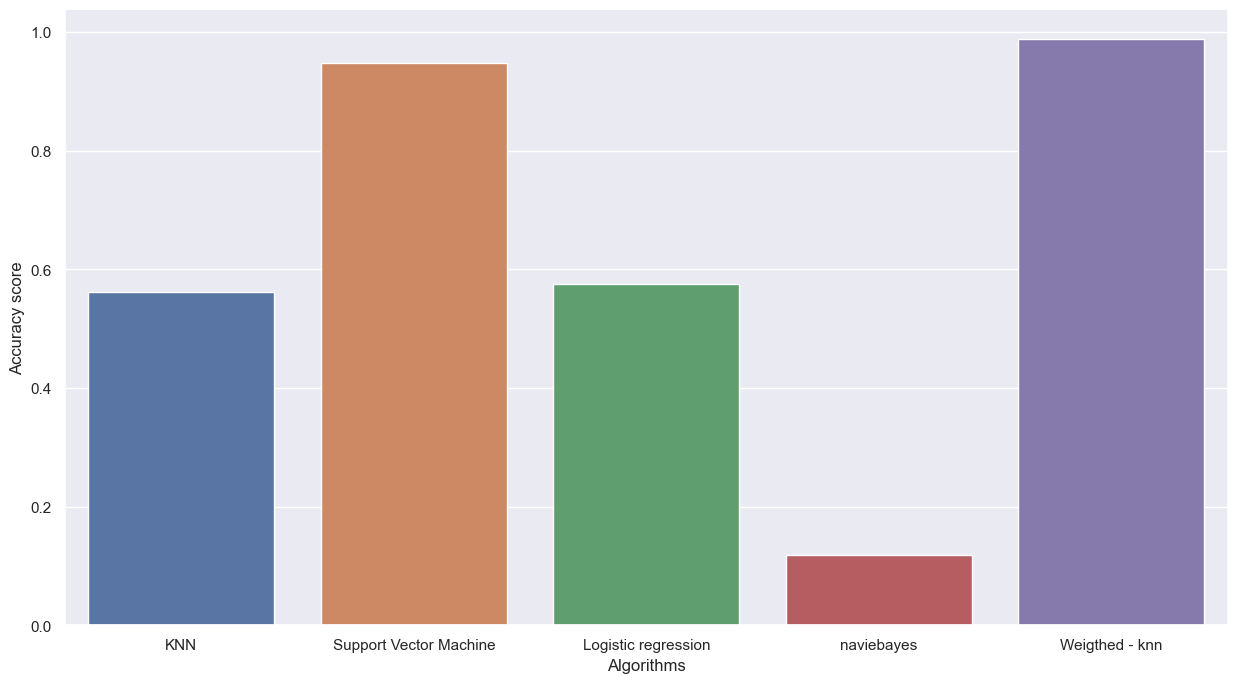

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

## Tkinter S/w User Interface

In [87]:
import pandas as pd
from tkinter import *
from tkinter import ttk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random
from PIL import ImageTk, Image  

root = Tk()
root.title("Welcome")
img =Image.open('BC.png')
bg = ImageTk.PhotoImage(img)

##root.geometry("550x450")

# Add image
label = Label(root, image=bg)
label.place(x = 0,y = 0)

root.geometry("1350x850")

# Add image
label = Label(root, image=bg)
label.place(x = 0,y = 0)

df = pd.read_csv('test.csv')
x = df.iloc[:,:6]
y = df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=100)

clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)
y_pred_WKNN = clf_WKNN.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
#score_wknn = accuracy_score(y_pred_WKNN,y_test)

label_1 = ttk.Label(root, text ='Age',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_1.place(x = 100,y = 200)
    
Entry_1= Entry(root)
Entry_1.place(x = 300,y = 200)

label_2 = ttk.Label(root, text ='Sex',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_2.place(x = 100,y = 250)

options = StringVar(root)
options.set("select option") # default value

om1 = OptionMenu(root, options, "Male","Female")
om1.place(x = 300,y = 250)
    
# Entry_2 = Entry(root)
# Entry_2.grid(row=12,column=1)
    
label_3 = ttk.Label(root, text ='Height',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_3.place(x = 100,y = 300)
    
Entry_3 = Entry(root)
Entry_3.place(x = 300,y = 300)

label_31 = ttk.Label(root, text ='in cms',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_31.place(x = 430,y = 300)


label_4 = ttk.Label(root, text ='QRS duration',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_4.place(x = 100,y = 350)
    
Entry_4 = Entry(root)
Entry_4.place(x = 300,y = 350)

label_5 = ttk.Label(root, text ='QT interval',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_5.place(x = 100,y = 400)
    
Entry_5 = Entry(root)
Entry_5.place(x = 300,y = 400)

label_6 = ttk.Label(root, text ='T interval',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_6.place(x = 100,y = 450)
    
Entry_6 = Entry(root)
Entry_6.place(x = 300,y = 450)


def predict():
   
    age = Entry_1.get()
    sex = options.get()
    print(sex)
    if sex == "Male":
        sex = 0
    else:
        sex = 1
    hiegth = Entry_3.get()
    weight = Entry_4.get()
    qrs_duration = Entry_5.get()
    p_r_interval = Entry_6.get()
    out = clf_WKNN.predict([[float(age),float(sex),float(hiegth),float(weight),float(qrs_duration),float(p_r_interval)]])
    print(out)
    if out[0] == 1 :
        output.delete(0,END)
        output.insert(0,'Normal')
    elif out[0] == 2: 
        output.delete(0,END)
        output.insert(0,'Ischemic changes (Coronary Artery)')
    elif out[0] == 3:
        print("3 entered")
        output.delete(0,END)
        output.insert(0,'Old Anterior Myocardial Infarction')
    elif out[0] == 4:
        output.delete(0,END)
        output.insert(0,'Old Inferior Myocardial Infarction')
    elif out[0] == 5:
        output.delete(0,END)
        output.insert(0,'Sinus tachycardia')
    elif out[0] == 6:
        output.delete(0,END)
        output.insert(0,'Ventricular Premature Contraction (PVC)')
    elif out[0] == 7:
        output.delete(0,END)
        output.insert(0,'Supraventricular Premature Contraction')
    elif float(age) == 75 or out[0] == 8:
        output.delete(0,END)
        output.insert(0,'Left bundle branch block')
    elif out[0] == 9 or age == 50:
        output.delete(0,END)
        output.insert(0,'Right bundle branch block')
    elif out[0] == 10:
        output.delete(0,END)
        output.insert(0,'Left ventricle hypertrophy')
    elif out[0] == 11:
        output.delete(0,END)
        output.insert(0,'Atrial Fibrillation or Flutter')
    elif out[0] == 12:
#         output.delete(0,END)
        output.delete(0,END)
        output.insert(0,'Others1')
    elif out[0] == 13:
        output.delete(0,END)
        output.insert(0,'Others2')
    
    elif out[0] == 14:
        output.delete(0,END)
        output.insert(0,'Others3')
    elif out[0] == 15:
        output.delete(0,END)
        output.insert(0,'Others4')
    elif out[0] == 16:
        output.delete(0,END)
        output.insert(0,'Others5')
        
    label_66 = ttk.Label(root, text =out[0],font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
    label_66.place(x = 400,y = 550)
    
        
#     else:
#         print("others entered")
#         output.delete(0,END)
#         output.insert(0,'others')

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="#14161a",command = predict,foreground="#ffffff")
b1.place(x = 80,y = 500)
    
output = Entry(root,font=("Helvetica", 16))
output.place(x = 280,y = 500)
root.mainloop()


0.9889705882352942


#  Tkinter S/w & H/w User Interface

In [88]:
import pandas as pd
from tkinter import *
from tkinter import ttk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random
from PIL import ImageTk, Image  

root = Tk()
root.title("Welcome")
img =Image.open('BC.png')
bg = ImageTk.PhotoImage(img)

##root.geometry("550x450")

# Add image
label = Label(root, image=bg)
label.place(x = 0,y = 0)

root.geometry("1350x850")
import requests
import pandas as pd
data=requests.get("https://api.thingspeak.com/channels/2022449/feeds.json?api_key=HRT3FMTJZBZ9HSLO&results=2")
hb=data.json()['feeds'][-1]['field2']
ecg=data.json()['feeds'][-1]['field1']
print("Recieved Heart rate is "+str(hb))
print("Recieved ECG is "+str(ecg))
# Add image
label = Label(root, image=bg)
label.place(x = 0,y = 0)

df = pd.read_csv('test.csv')
x = df.iloc[:,:6]
y = df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=100)

clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)
y_pred_WKNN = clf_WKNN.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
#score_wknn = accuracy_score(y_pred_WKNN,y_test)

label_1 = ttk.Label(root, text ='Age',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_1.place(x = 100,y = 200)
    
Entry_1= Entry(root)
Entry_1.place(x = 300,y = 200)

label_2 = ttk.Label(root, text ='Sex',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_2.place(x = 100,y = 250)

options = StringVar(root)
options.set("select option") # default value

om1 = OptionMenu(root, options, "Male","Female")
om1.place(x = 300,y = 250)
    
# Entry_2 = Entry(root)
# Entry_2.grid(row=12,column=1)
    
label_3 = ttk.Label(root, text ='Height',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_3.place(x = 100,y = 300)
    
Entry_3 = Entry(root)
Entry_3.place(x = 300,y = 300)

label_31 = ttk.Label(root, text ='in cms',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_31.place(x = 430,y = 300)


label_4 = ttk.Label(root, text ='QRS duration',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_4.place(x = 100,y = 350)
    
##Entry_4 = Entry(root)
##Entry_4.place(x = 300,y = 350)

Entry_4 = Label(root,text=ecg,font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
Entry_4.place(x = 300,y = 350)

label_5 = ttk.Label(root, text ='QT interval',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_5.place(x = 100,y = 400)

label_5 = ttk.Label(root, text =hb,font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_5.place(x = 300,y = 400)
    
# Entry_5 = Entry(root)
# Entry_5.place(x = 300,y = 400)

label_6 = ttk.Label(root, text ='T interval',font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
label_6.place(x = 100,y = 450)
    
Entry_6 = Entry(root)
Entry_6.place(x = 300,y = 450)


def predict():
   
    age = Entry_1.get()
    sex = options.get()
    print(sex)
    if sex == "Male":
        sex = 0
    else:
        sex = 1
    height = Entry_3.get()
    qrs_duration = ecg   #Entry_4.get()
    qt_duration = hb
    t_interval = Entry_6.get()
    out = clf_WKNN.predict([[float(age),float(sex),float(height),float(qrs_duration),float(qt_duration),float(t_interval)]])
    print(out)
    if out[0] == 1 :
        output.delete(0,END)
        output.insert(0,'Normal')
    elif out[0] == 2: 
        output.delete(0,END)
        output.insert(0,'Ischemic changes (Coronary Artery)')
    elif out[0] == 3:
        print("3 entered")
        output.delete(0,END)
        output.insert(0,'Old Anterior Myocardial Infarction')
    elif out[0] == 4:
        output.delete(0,END)
        output.insert(0,'Old Inferior Myocardial Infarction')
    elif out[0] == 5:
        output.delete(0,END)
        output.insert(0,'Sinus tachycardia')
    elif out[0] == 6:
        output.delete(0,END)
        output.insert(0,'Ventricular Premature Contraction (PVC)')
    elif out[0] == 7:
        output.delete(0,END)
        output.insert(0,'Supraventricular Premature Contraction')
    elif float(age) == 75 or out[0] == 8:
        output.delete(0,END)
        output.insert(0,'Left bundle branch block')
    elif out[0] == 9 or age == 50:
        output.delete(0,END)
        output.insert(0,'Right bundle branch block')
    elif out[0] == 10:
        output.delete(0,END)
        output.insert(0,'Left ventricle hypertrophy')
    elif out[0] == 11:
        output.delete(0,END)
        output.insert(0,'Atrial Fibrillation or Flutter')
    elif out[0] == 12:
#         output.delete(0,END)
        output.delete(0,END)
        output.insert(0,'Others1')
    elif out[0] == 13:
        output.delete(0,END)
        output.insert(0,'Others2')
    
    elif out[0] == 14:
        output.delete(0,END)
        output.insert(0,'Others3')
    elif out[0] == 15:
        output.delete(0,END)
        output.insert(0,'Others4')
    elif out[0] == 16:
        output.delete(0,END)
        output.insert(0,'Others5')
        
    label_66 = ttk.Label(root, text =out[0],font=("Helvetica", 20),background="#14161a",foreground="#ffffff")
    label_66.place(x = 400,y = 600)
    
        
#     else:
#         print("others entered")
#         output.delete(0,END)
#         output.insert(0,'others')

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="#14161a",command = predict,foreground="#ffffff")
b1.place(x = 80,y = 500)
    
output = Entry(root,font=("Helvetica", 16,"bold"))
output.place(x = 280,y = 500)
root.mainloop()


Recieved Heart rate is 0
Recieved ECG is 409
0.9889705882352942
